<a href="https://colab.research.google.com/github/Manikandan-professional/Placements-Data-Analysis/blob/main/Placements_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the Necessary Packages**

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#**Conversion the CSV file to DataFrame**

In [211]:
data=pd.read_csv('https://raw.githubusercontent.com/Manikandan-professional/Placements-Data-Analysis/main/Placement_Data_Full_Class.csv')
df=pd.DataFrame(data)
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# **Null Values Removal**

In [212]:
print(df.isnull().sum())

df.dropna(axis=0,inplace=True)
df=df.reset_index()
df.head()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
4,7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0


In [213]:
df=df.drop(columns=['index'])
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
4,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
144,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
145,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
146,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


# **Data Cleaning**

# column 1 sl_no

In [214]:
df=df.drop(columns=['sl_no'],axis=1)

# column 2 gender

In [215]:
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])

**1. Since the Gender Column is categorical variable we are changing the values to 0 or 1**

# column 3 ssc_p

The Number of Null values in SSC_P column is: 0
The Minimum marks secured by student in SSC_P column is: 49.0
The Maximum marks secured by student in SSC_P column is: 89.4
The Average marks secured by students in SSC_P column is: 71.72
       count       mean       std   min   25%   50%     75%   max
ssc_p  148.0  71.721486  8.715445  49.0  65.0  72.5  78.125  89.4


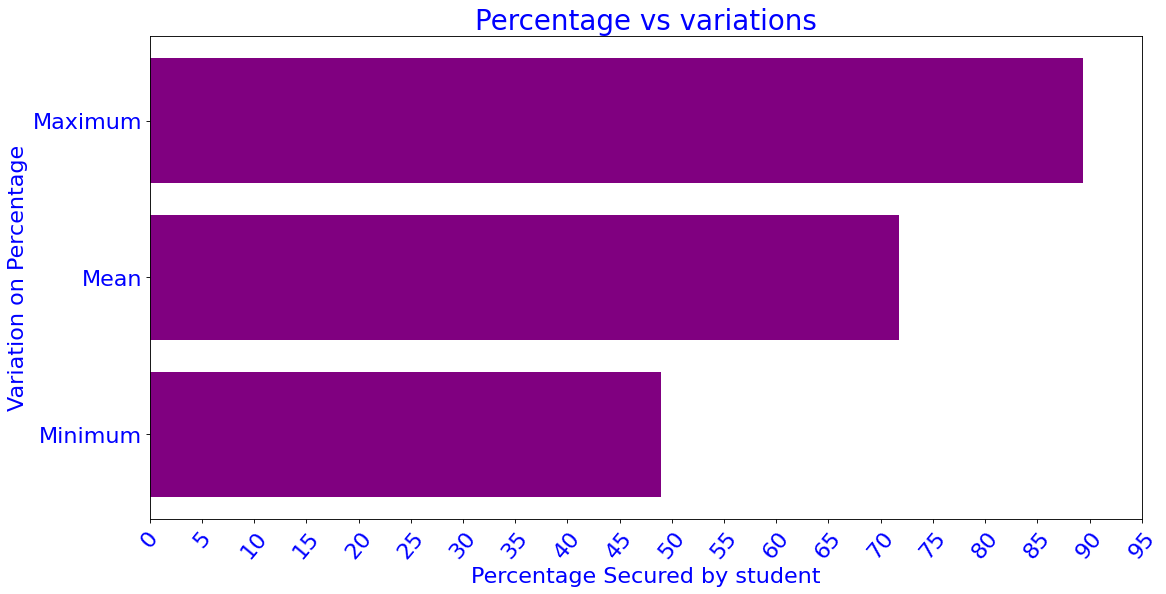

In [216]:
print('The Number of Null values in SSC_P column is:',df['ssc_p'].isnull().sum())
print('The Minimum marks secured by student in SSC_P column is:',np.min(df['ssc_p']))
print('The Maximum marks secured by student in SSC_P column is:',np.max(df['ssc_p']))
print('The Average marks secured by students in SSC_P column is:',round(np.mean(df['ssc_p']),2))
idx=['Minimum','Mean','Maximum']
values=[np.min(df['ssc_p']),round(np.mean(df['ssc_p']),2),np.max(df['ssc_p'])]
print(df[['ssc_p']].describe().T)
plt.figure(figsize=(16,8),dpi=80)
plt.barh(idx,values,color='purple')
plt.title('Percentage vs variations',fontsize=25,color='blue')
plt.xlabel('Percentage Secured by student',fontsize=20,color='blue')
plt.ylabel('Variation on Percentage',fontsize=20,color='blue')
plt.xticks(np.arange(0,100,5),rotation=50,fontsize=20,color='blue')
plt.yticks(fontsize=20,color='blue')
plt.show()

**1. In the SSC_P column the minimum secured marks of the student is 49 marks and highest secured is 89.40 marks**

**2. On average the students are securing 71.72**

# column 4 ssc_b

In [217]:
df['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

The Number of Central syllabus students is: 78
The Number of Central syllabus students is: 70


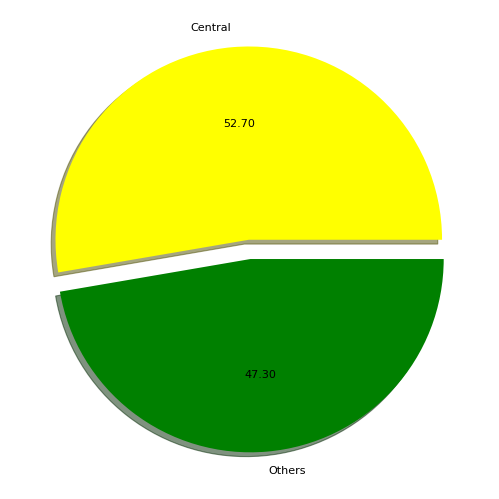

In [218]:
print('The Number of Central syllabus students is:',df[df['ssc_b']=='Central'].shape[0])
print('The Number of Central syllabus students is:',df[df['ssc_b']=='Others'].shape[0])
idx1=['Central','Others']
values1=[df[df['ssc_b']=='Central'].shape[0],df[df['ssc_b']=='Others'].shape[0]]
mylabels=['Central' ,'Others']
myexplode=[0.05,0.05]
co=['yellow','green']
plt.figure(figsize=(16,8),dpi=80)
plt.pie(values1,labels = mylabels, explode = myexplode, shadow = True,autopct='%.2f',colors=co)
plt.show()

**1. From the above pie chart it is clear that many of the students are studying under central syllabus**


In [219]:
df['ssc_b']=le.fit_transform(df['ssc_b'])

**2. Since it is also a categorical feature we are label encoding it for our convenience**


In [220]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,1,79.33,0,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,1,65.00,0,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,1,85.80,0,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
4,1,82.00,0,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0


# column 5 hsc_p

The Number of Null values in HSC_P column is: 0
The Minimum marks secured by student in HSC_P column is: 50.83
The Maximum marks secured by student in HSC_P column is: 97.7
The Average marks secured by students in HSC_P column is: 69.93
            hsc_p
count  148.000000
mean    69.926554
std      9.329268
min     50.830000
25%     63.000000
50%     68.000000
75%     75.250000
max     97.700000


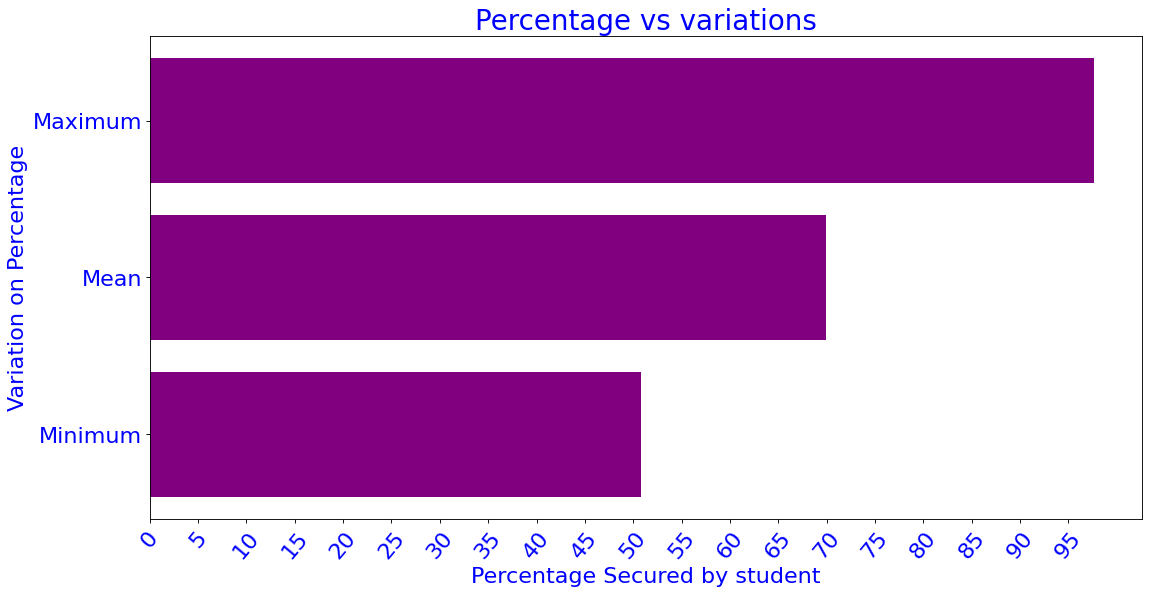

In [221]:
print('The Number of Null values in HSC_P column is:',df['hsc_p'].isnull().sum())
print('The Minimum marks secured by student in HSC_P column is:',np.min(df['hsc_p']))
print('The Maximum marks secured by student in HSC_P column is:',np.max(df['hsc_p']))
print('The Average marks secured by students in HSC_P column is:',round(np.mean(df['hsc_p']),2))
idx=['Minimum','Mean','Maximum']
values=[np.min(df['hsc_p']),round(np.mean(df['hsc_p']),2),np.max(df['hsc_p'])]
print(df[['hsc_p']].describe())
plt.figure(figsize=(16,8),dpi=80)
plt.barh(idx,values,color='purple')
plt.title('Percentage vs variations',fontsize=25,color='blue')
plt.xlabel('Percentage Secured by student',fontsize=20,color='blue')
plt.ylabel('Variation on Percentage',fontsize=20,color='blue')
plt.xticks(np.arange(0,100,5),rotation=50,fontsize=20,color='blue')
plt.yticks(fontsize=20,color='blue')
plt.show()

# column 6 hsc_b

In [222]:
df['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

The Number of Central syllabus students is: 57
The Number of Central syllabus students is: 91


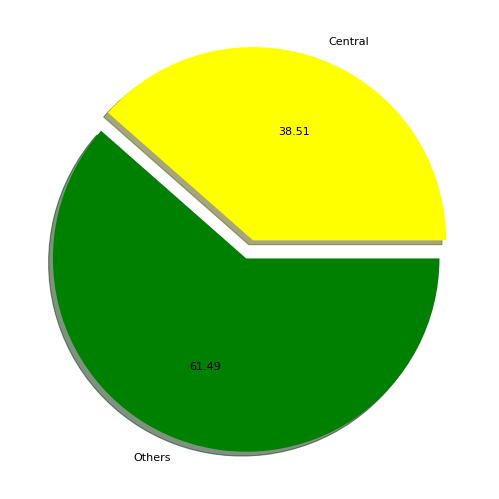

In [223]:
print('The Number of Central syllabus students is:',df[df['hsc_b']=='Central'].shape[0])
print('The Number of Central syllabus students is:',df[df['hsc_b']=='Others'].shape[0])
idx1=['Central','Others']
values1=[df[df['hsc_b']=='Central'].shape[0],df[df['hsc_b']=='Others'].shape[0]]
mylabels=['Central' ,'Others']
myexplode=[0.05,0.05]
co=['yellow','green']
plt.figure(figsize=(16,8),dpi=80)
plt.pie(values1,labels = mylabels, explode = myexplode, shadow = True,autopct='%.2f',colors=co)
plt.show()

**1. From the above pie chart it is clear that many of the students are studying under Other syllabus after completing their SSC**


In [224]:
df['hsc_b']=le.fit_transform(df['hsc_b'])

**2. Since it is also a categorical feature we are label encoding it for our convenience**


In [225]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
4,1,82.00,0,64.00,0,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0


# column 7 hsc_s

# column 8 degree_p

# column 9 degree_t

# column 10 workex

# column 11 etest_p

# column 12 specialisation

# column 13 mba_p

# column 14 status

# column 15 salary

# **Cleaned Data for Processing**

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          148 non-null    int64  
 1   ssc_p           148 non-null    float64
 2   ssc_b           148 non-null    int64  
 3   hsc_p           148 non-null    float64
 4   hsc_b           148 non-null    int64  
 5   hsc_s           148 non-null    object 
 6   degree_p        148 non-null    float64
 7   degree_t        148 non-null    object 
 8   workex          148 non-null    object 
 9   etest_p         148 non-null    float64
 10  specialisation  148 non-null    object 
 11  mba_p           148 non-null    float64
 12  status          148 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), int64(3), object(5)
memory usage: 16.3+ KB


In [227]:
df.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,etest_p,mba_p,salary
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,0.675676,71.721486,0.472973,69.926554,0.614865,68.740541,73.238041,62.579392,288655.405405
std,0.469711,8.715445,0.500964,9.329268,0.488280,6.518087,13.729333,5.884583,93457.452420
min,0.000000,49.000000,0.000000,50.830000,0.000000,56.000000,50.000000,52.380000,200000.000000
25%,0.000000,65.000000,0.000000,63.000000,0.000000,65.000000,60.000000,57.772500,240000.000000
50%,1.000000,72.500000,0.000000,68.000000,1.000000,68.000000,72.000000,62.245000,265000.000000
75%,1.000000,78.125000,1.000000,75.250000,1.000000,72.422500,85.000000,66.760000,300000.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,91.000000,98.000000,77.890000,940000.000000
